In [1]:
import requests #sends http request to github
import json #interprets instructions received back from github
from pprint import pprint
import matplotlib.pyplot as plt
import logging

In [100]:
def top_gitrepo(topnum):
  '''This function returns a list and graph of GitHub repos with most forks

  This function conencts to GitHub API and retrives the top number of repositories
  according to the number of forks. The user specifies how many repositories they
  want to identify.

  Parameters
  ----------
  topnum : int. User enters this. Should be positive.

  Returns
  -------
  user_repo : dict
  user_forks : dict
  Plot : user_repo*user_forks

  Examples
  -------
  top_gitrepo(5)

  ['jtleek/datasharing',
 'rdpeng/ProgrammingAssignment2',
 'octocat/Spoon-Knife',
 'SmartThingsCommunity/SmartThingsPublic',
 'tensorflow/tensorflow']

 matplotlib horizontal bar plot

 '''
  # ValueError test: user entry should be positive integer above zero
  if topnum <= 0:
    raise ValueError("Value entered by user must be greater than 0")
  if isinstance(topnum, int):
    url = f'https://api.github.com/search/repositories?q=forks:>1&sort=forks&per_page={topnum}'
  #elif type(topnum) is str:
  #  raise ValueError("Inputted value was a string, but the entry must be an integer")
  elif isinstance(topnum, float):
    try:
      topnum_int = int(topnum)
      print(topnum_int)
      url = f'https://api.github.com/search/repositories?q=forks:>1&sort=forks&per_page={topnum_int}'
    except ValueError as ve:
      raise ValueError(f'Input received was "{ve}", but the entry must be an integer.')



  # send request to GitHub
  r = requests.get(url)

  # print initial responses - 200 means successful retrieval from GitHub
  print(r.status_code)

  # returns JSON file with user details requested as a string
  #print(r.text)

  r_json = json.loads(r.text)
  #pprint(r_json) #looks the same, but with a few format differences

  items = r_json['items']

  user_repo = []
  user_forks = []

  for item in items:
    user_repo.append(item['full_name'])
    user_forks.append(item['forks'])

  # Returns list of github repos, and list of their fork stats
  pprint(user_repo)
  #pprint(user_forks)

  # Use matplotlib to generate horizontal bar graph of two parameters
  plt.barh(user_repo, user_forks)
  plt.title(label=f'Top {topnum} GitHub Users With The Most Forks')
  plt.xlabel('Number of Forks')
  plt.ylabel('User Names')

4
200
['jtleek/datasharing',
 'rdpeng/ProgrammingAssignment2',
 'octocat/Spoon-Knife',
 'SmartThingsCommunity/SmartThingsPublic']


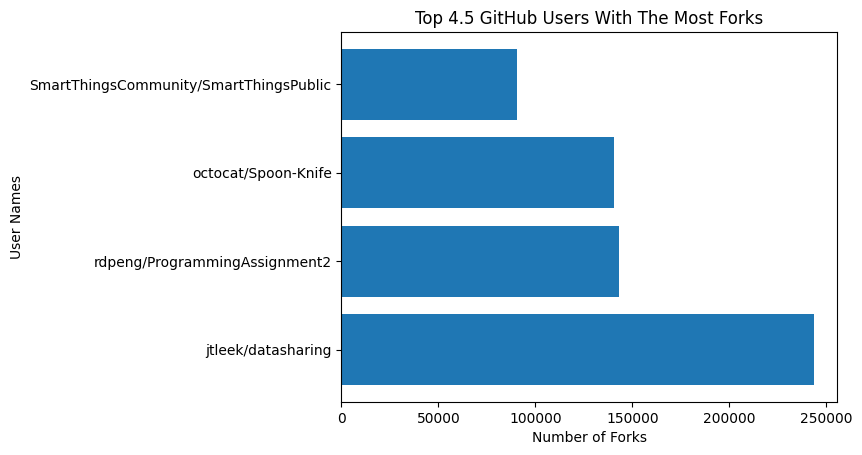

In [101]:
top_gitrepo(4.5)